<a href="https://colab.research.google.com/github/israa252/Prediction-of-Product-Sales/blob/main/Project_1_Part_3_Prediction_of_Product_Sales(israa_rasheed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Israa Rasheed

## Project Overview
This project involves exploring and cleaning a retail sales dataset to prepare it for analysis and predictive modeling. The dataset includes product details, store information, and sales data.  

Key steps include:  
- Inspecting the dataset structure and data types.  
- Handling missing values and removing duplicates.  
- Standardizing categorical variables.  
- Summarizing numerical features for analysis.  

The cleaned dataset is ready for further tasks such as predicting product sales.


## Load and Inspect Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Save the filepath and load the data as "df_titanic"
fpath  ="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df= pd.read_csv(fpath)
df.info()
df.head()
df.shape
df.dtypes


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## Clean Data

In [4]:
# Drop duplicate rows
df = df.drop_duplicates()

# Check missing values
df.isnull().sum()

# Fill missing numeric values with 0
df['Item_Weight'] = df['Item_Weight'].fillna(0)

# Fill missing categorical values with 'Unknown'
df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')

# Confirm missing values are handled
df.isnull().sum()

# Standardize text: lowercase all values in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()

# Replace inconsistent categories with consistent labels
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'low_fat',
    'lf': 'low_fat',
    'reg': 'regular'
})

# Display summary statistic (min, max, mean of numeric columns)
df.describe().loc[['min', 'max', 'mean']]

df.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,0.000,low_fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350


## Exploratory Data Analysis

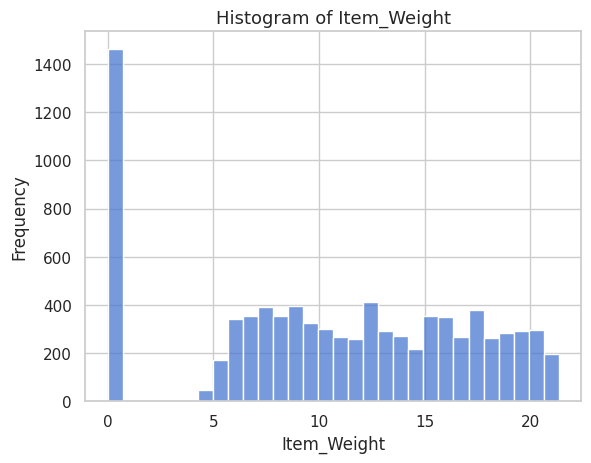

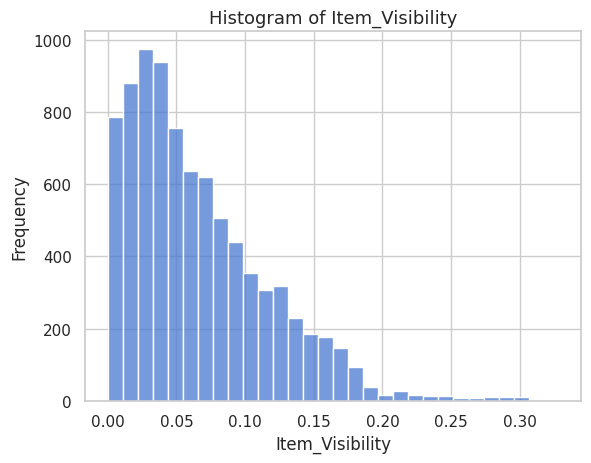

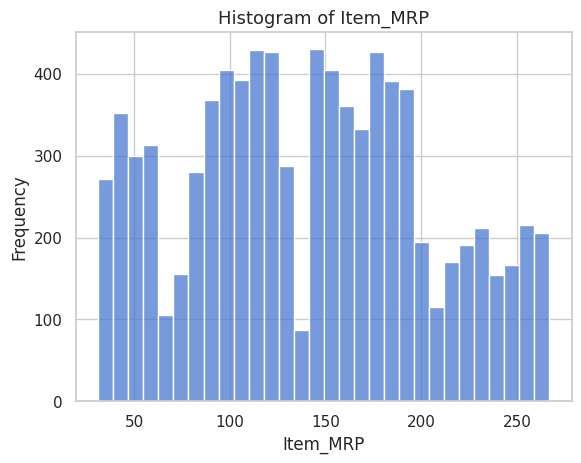

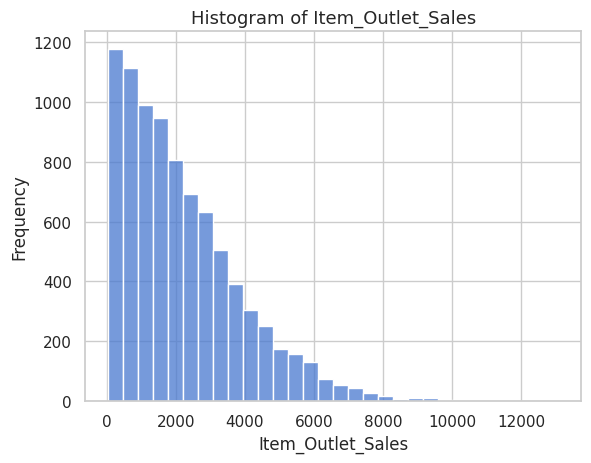

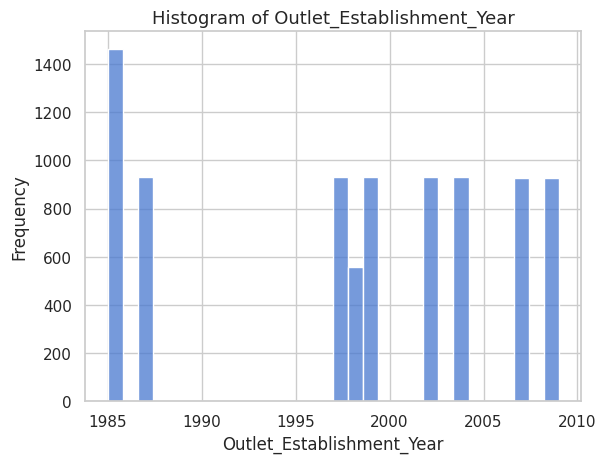

In [29]:
numeric_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales", "Outlet_Establishment_Year"]

for col in numeric_cols:
    sns.histplot(df[col], bins=30)
    plt.title(f"Histogram of {col}", fontsize=13)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

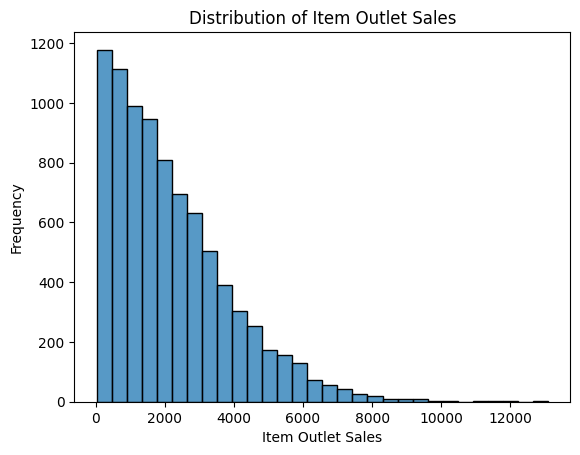

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Item_Outlet_Sales"], bins=30)
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.show()

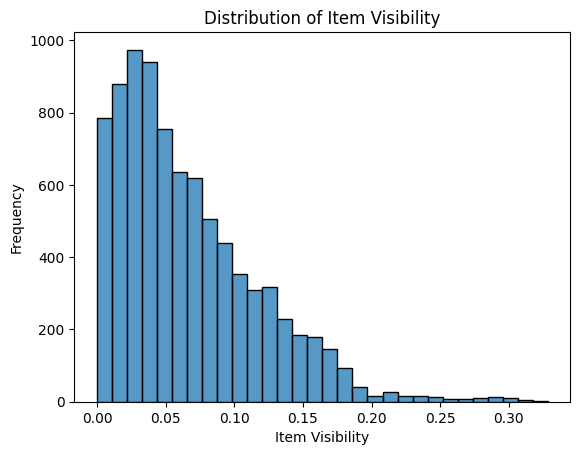

In [10]:
sns.histplot(df["Item_Visibility"], bins=30)
plt.title("Distribution of Item Visibility")
plt.xlabel("Item Visibility")
plt.ylabel("Frequency")
plt.show()

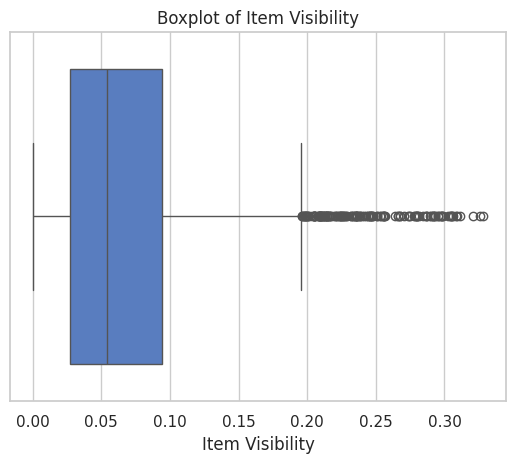

In [23]:
sns.boxplot(x=df["Item_Visibility"])
plt.title("Boxplot of Item Visibility")
plt.xlabel("Item Visibility")
plt.show()

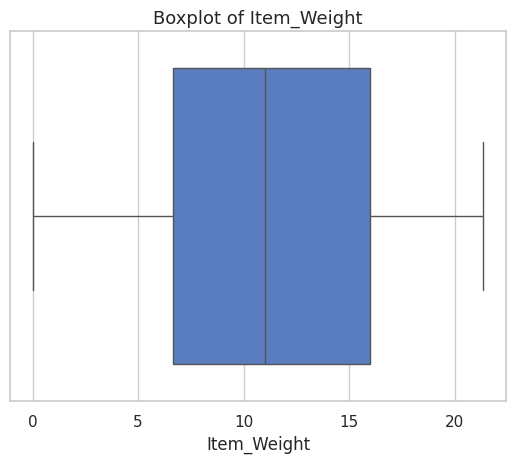

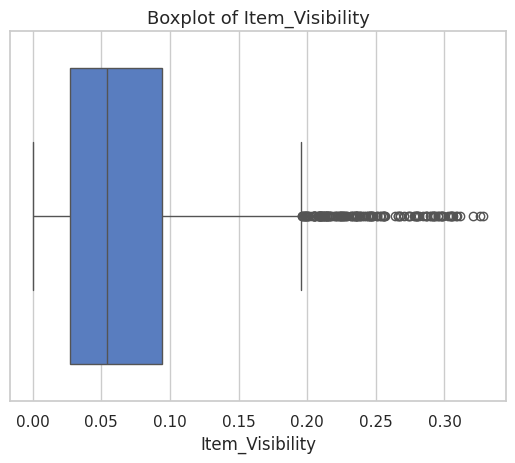

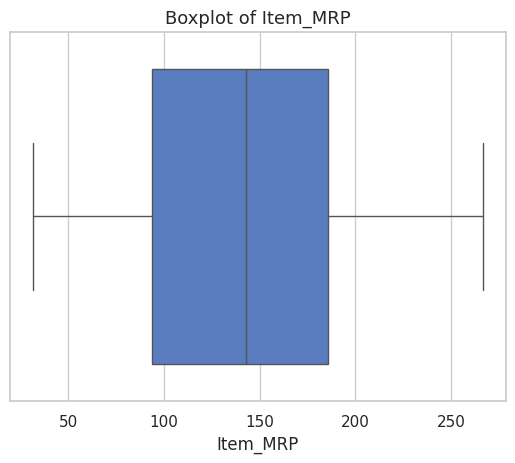

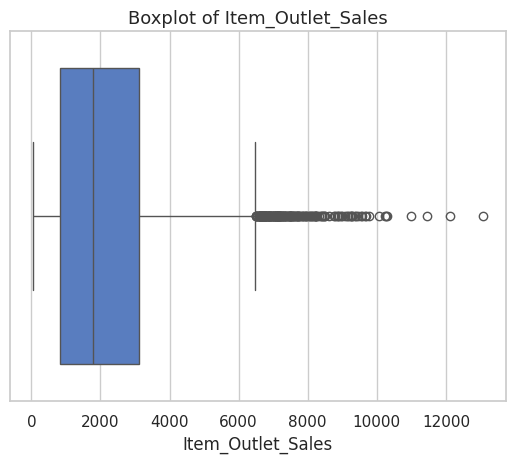

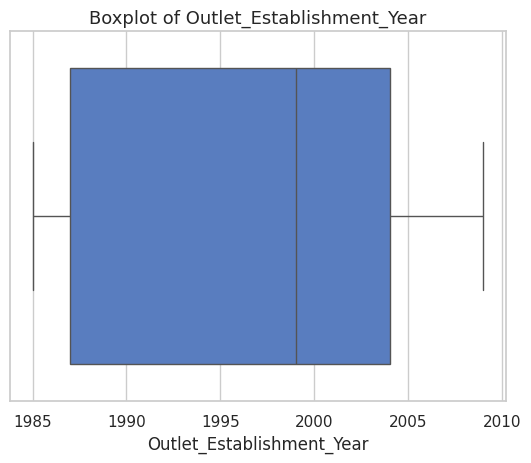

In [27]:
numeric_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales", "Outlet_Establishment_Year"]
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=13)
    plt.xlabel(col, fontsize=12)
    plt.show()


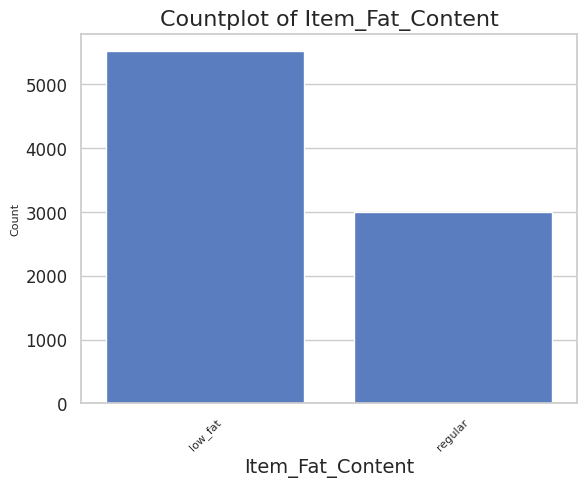

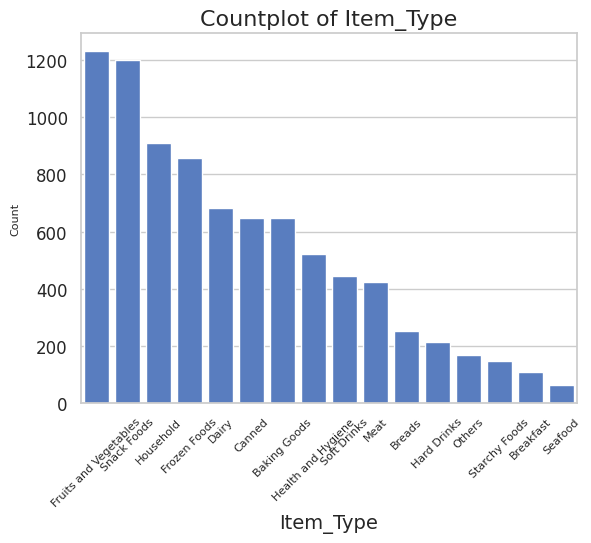

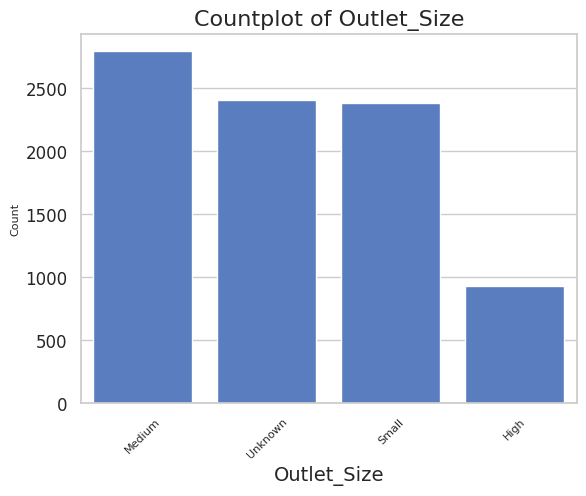

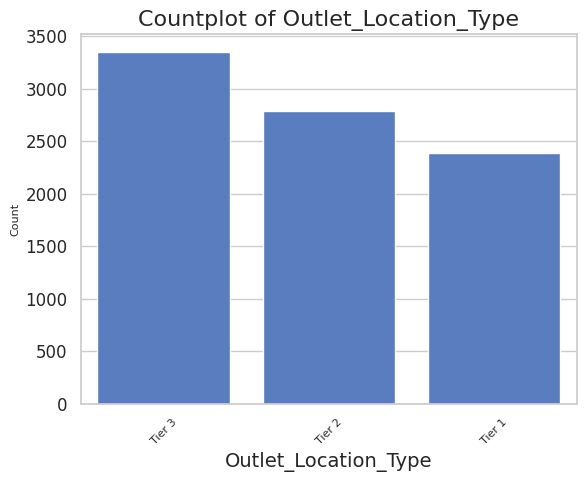

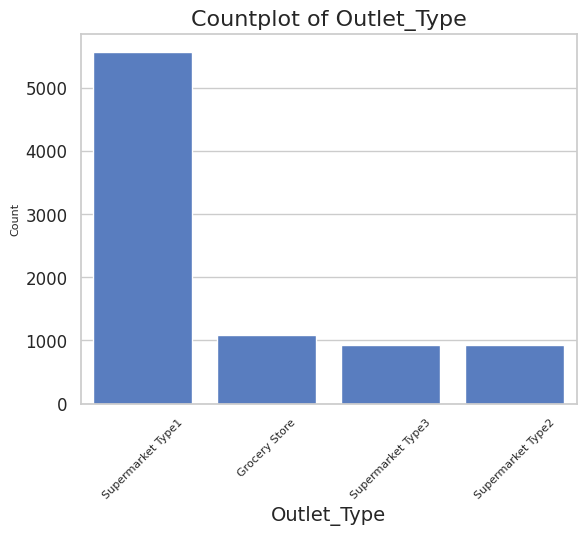

In [34]:
categorical_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
for col in categorical_cols:
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=8)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=12)
    plt.show()

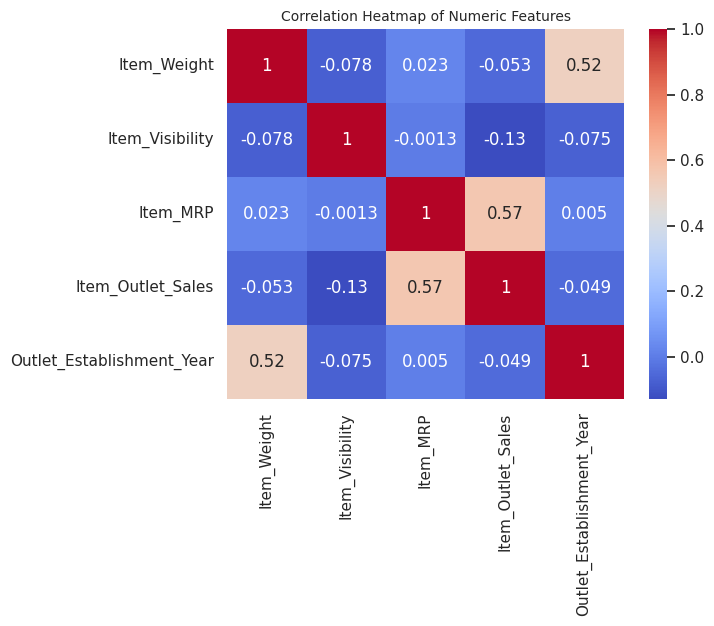

In [36]:
numeric_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales", "Outlet_Establishment_Year"]
corr = df[numeric_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features", fontsize=10)
plt.show()
